In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sympy import *
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
init_printing()

x, y, z, t = symbols('x y z t')

<class 'int'>


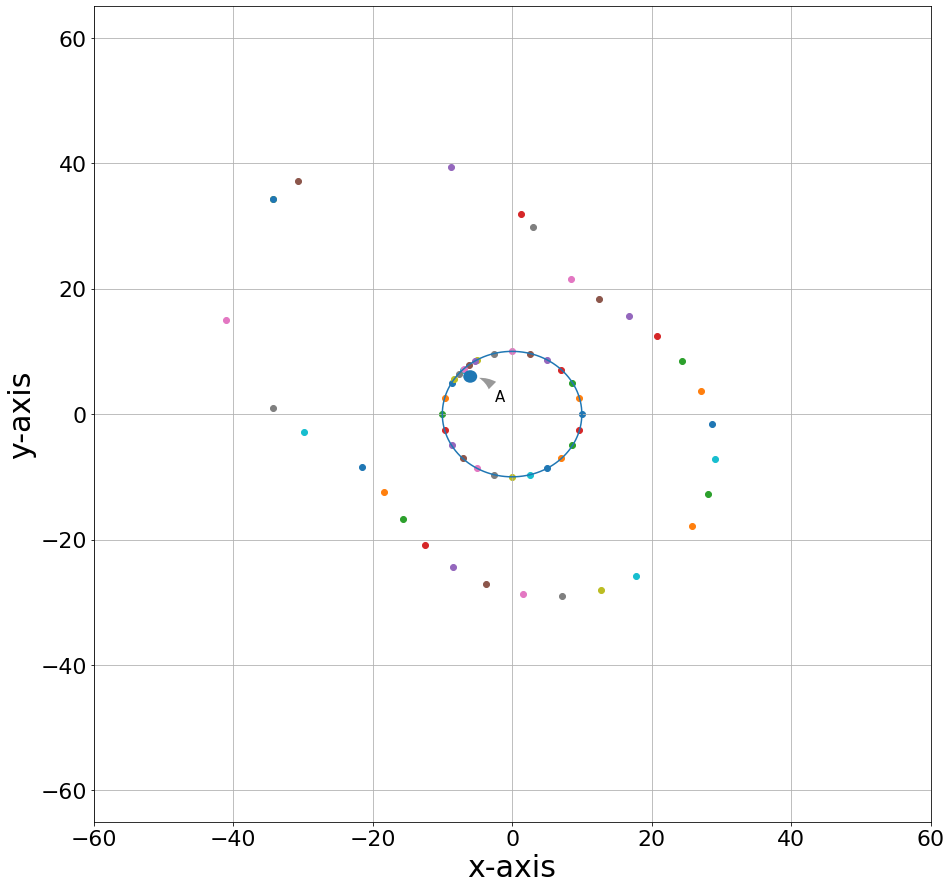

In [14]:
a = 0
b = 0
x1 = []
y1 = []
o = (-6, 6)
j = o[0] + 5
q = o[1] + 3
print(type(j))
r = 10
xy = []
degree = 40
dt1 = 0              #the distance on the first inner contact, outgoing
dt2 = 0             #the distance of parallel path on the other side of circle, between the two intersections.

for theta in range(0, 360):
    x1.append(a + r * math.cos(math.radians(theta)))
    y1.append(b + r * math.sin(math.radians(theta)))
    
fig, ax = plt.subplots(figsize = (15, 15))
#ax.figure(figsize = (15, 15))
#ax[0, 0].scatter(o[0], o[1])

el = Ellipse(o, 2, 2)
ax.add_patch(el)

for i, theta in enumerate(range(0, 360, 15)):
    txt = str(i)
    xy.append((a + r * math.cos(math.radians(theta)), (b + r * math.sin(math.radians(theta)))))
    ax.scatter(xy[i][0], xy[i][1])
    #ax.annotate(txt, (xy[i][0], xy[i][1]), fontsize=20)
    if i == 23:
        for j, theta in enumerate(range(122, 148, 6)):
            xy.append((a + r * math.cos(math.radians(theta)), (b + r * math.sin(math.radians(theta)))))
            ax.scatter(xy[j+24][0], xy[j+24][1])

    #ax[i, j].add_patch(el)
ax.annotate('A', size=15,
xy=o, xycoords='data',
xytext=(-1, 4), textcoords='data',
arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                fc="0.6", ec="none",
                patchB=el,
                connectionstyle="arc3,rad=0.3"),
horizontalalignment='right', verticalalignment='top')
ax.plot(x1, y1)
ax.grid()
plt.setp(ax.get_xticklabels(), fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=22)
ax.set_xlabel('x-axis', fontsize=30)
ax.set_ylabel('y-axis', fontsize=30)
ax.set_xlim([-60, 60])
ax.set_ylim([-65, 65])
title = ''
ax.set_title(title, size=30)


#일차 방정식 그래프 그리기
for i, p in enumerate(xy):

    m1 = (p[1]-o[1])/(p[0]-o[0])                   #두 점을 지나는 직선의 기울기
    n1 = o[1]-(m1*o[0])                             #y절편
    ct1 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n1, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
    (ip100, ip101), (ip110, ip111) = (round(N(ct1[0][0]), 4), round(N(ct1[0][1]), 4)), (round(N(ct1[1][0]), 4), round(N(ct1[1][1]), 4)) #intersection point
    dt1 = math.sqrt((ip111-ip101)**2+(ip110-ip100)**2)
    #print(ip100, ip101, ip110, ip111)

    
    m2 = (p[1] - 0)/(p[0] - 0)                     #첫번째 원과의 접점과 원점을 통과하는 직선의 기울기
    n2 = p[1] - (m2*p[0])
    ct2 = solve([Eq(x**2+y**2, 100), Eq(m2*x-y+n2, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
    (ip200, ip201), (ip210, ip211) = (round(N(ct2[0][0]), 4), round(N(ct2[0][1]), 4)), (round(N(ct2[1][0]), 4), round(N(ct2[1][1]), 4)) #intersection point
    #print(ip200, ip201, ip210, ip211)
    #print('')
    
    if (ip110, ip111) == (ip210, ip211):
        n3 = ip201 - (m1*ip200)
        ct3 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n3, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip300, ip301), (ip310, ip311) = (round(N(ct3[0][0]), 4), round(N(ct3[0][1]), 4)), (round(N(ct3[1][0]), 4), round(N(ct3[1][1]), 4)) #intersection point
        dt2 = math.sqrt((ip311-ip301)**2+(ip310-ip300)**2)
    else:
        n3 = ip211 - (m1*ip210)
        ct3 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n3, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip300, ip301), (ip310, ip311) = (round(N(ct3[0][0]), 4), round(N(ct3[0][1]), 4)), (round(N(ct3[1][0]), 4), round(N(ct3[1][1]), 4)) #intersection point
        dt2 = math.sqrt((ip311-ip301)**2+(ip310-ip300)**2)
    
    T_dt = dt1 + dt2
    
    if (ip100, ip101) == (ip200, ip201):
        o1 = solve([Eq(x**2-2*o[0]*x+y**2-2*o[1]*y+o[0]**2+o[1]**2-T_dt**2, 0), Eq(m1*x-y+n1, 0)], [x, y])
        other_o = (N(o1[0][0]), N(o1[0][1]))
    else:
        o1 = solve([Eq(x**2-2*o[0]*x+y**2-2*o[1]*y+o[0]**2+o[1]**2-T_dt**2, 0), Eq(m1*x-y+n1, 0)], [x, y])
        other_o = (N(o1[1][0]), N(o1[1][1]))

    ax.scatter(other_o[0], other_o[1])
    #ax.annotate(str(i), (other_o[0], other_o[1]), fontsize=15)
    
    #plt.scatter(N(ct[0][0]), N(ct[0][1]))
    #plt.scatter(N(ct[1][0]), N(ct[1][1]))

#fig.savefig('fig_1_4.png', dpi=300)
#fig.savefig('fig_1_4.jpg', pil_kwargs={'quality':50})